In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from  keras_preprocessing.image import ImageDataGenerator
from PIL import Image # for displaying Images
import matplotlib.pyplot as plt
import seaborn as sns # for count plot
import sklearn.model_selection   #for tairn/cross-validation split
from sklearn.utils import shuffle
import shutil #for copying images


%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train_labels.csv', 'train', 'sample_submission.csv', 'test']


In [2]:
#loading the data in to the program
df= pd.read_csv("../input/train_labels.csv",dtype=str)
print(df.head)



<bound method NDFrame.head of                                               id label
0       f38a6374c348f90b587e046aac6079959adf3835     0
1       c18f2d887b7ae4f6742ee445113fa1aef383ed77     1
2       755db6279dae599ebb4d39a9123cce439965282d     0
3       bc3f0c64fb968ff4a8bd33af6971ecae77c75e08     0
4       068aba587a4950175d04c680d38943fd488d6a9d     0
5       acfe80838488fae3c89bd21ade75be5c34e66be7     0
6       a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da     1
7       7f6ccae485af121e0b6ee733022e226ee6b0c65f     1
8       559e55a64c9ba828f700e948f6886f4cea919261     0
9       8eaaa7a400aa79d36c2440a4aa101cc14256cda4     0
10      a106469bbfda4cdc5a9da7ac0152927bf1b4a92d     0
11      c3d660212bf2a11c994e0eadff13770a9927b731     1
12      a1991e73a9b676faddd2bd47c39754b14d1eb923     0
13      08566ce82d4406f464c9c2a3cd014704735db7a9     0
14      94fa32b29cc1c00403176c0795fffa3cfaa0f20e     1
15      f416de7491a31951f79b3cee75b002f4d1bf0162     0
16      a1c001f6b242c72d3066f15ac6e

0    130908
1     89117
Name: label, dtype: int64


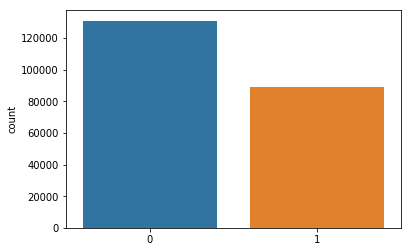

In [3]:
print(df['label'].value_counts())
sns.countplot(df.values[:,1])

#Plot clearly shows we habe more neagtive examples than positive

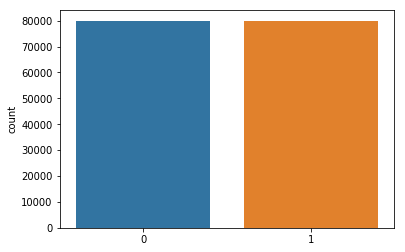

In [4]:
# removing this image because it caused a training error previously
df = df[df['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']
# removing this image because it's black
df = df[df['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']

#since we have an unbalanced data distrrubution, we will balance it.
SAMPLE_SIZE = 80000 # load 80k negative examples

# take a random sample of class 0 with size equal to num samples in class 1
df_0 = df[df['label'] == '0'].sample(SAMPLE_SIZE, random_state = 101)
# filter out class 1
df_1 = df[df['label'] == '1'].sample(SAMPLE_SIZE, random_state = 101)

# concat the dataframes
df = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
# shuffle
df = shuffle(df)



df['label'].value_counts()
sns.countplot(df.values[:,1])
#now the following plot looks balanced

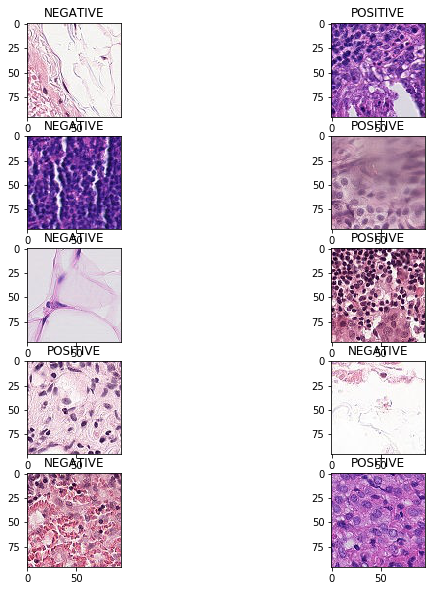

In [5]:
#Here plotting fe positive and negative examples

fig=plt.figure(figsize=(10,10))
columns = 2
rows = 5
for i in range(1, columns*rows +1):
    j=np.random.randint(1000,10000)
    axs=fig.add_subplot(rows, columns, i)
    img=Image.open('../input/train/'+df.values[j,0]+'.tif')
    if (df.values[j,1] == '1'):
        axs.set_title("POSITIVE")
    else:
        axs.set_title("NEGATIVE")

        
    plt.imshow(img)

plt.show()


In [6]:
# train_test_split # stratify=y creates a balanced validation set.
y = df['label']
df_train, df_val = sklearn.model_selection.train_test_split(df, test_size=0.10, random_state=101, stratify=y)

print("Train Data :")
print(df_train['label'].value_counts())

print("Cross Validation Data :")
print(df_val['label'].value_counts())

Train Data :
1    72000
0    72000
Name: label, dtype: int64
Cross Validation Data :
1    8000
0    8000
Name: label, dtype: int64


In [7]:
for image in df_train['id'].values:
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image + '.tif'
    print(fname)
    break

9864efeaaf98f9e7cae8e8fbb16a2dc94c96c41f.tif


In [8]:

#creating a directory structure to keep tain and validation data
# Create a new directory
base_dir = 'base_dir'
#removing the dir if already exist from previous runs
#shutil.rmtree(base_dir)

os.mkdir(base_dir)

# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

#creating category wise sub-directories as required by Kears flow_from_directory
for fold in [train_dir, val_dir]:
    for subf in ["0", "1"]:
        os.makedirs(os.path.join(fold, subf))



In [9]:
print(df.head())
df.set_index('id', inplace=True)
df['image_path'] = df.index 
print(df.head())
# for image in df_train.values:
#     print(image)
#     print(df_train.at[image[0]])
#     break

                                              id label
86071   18879aef490d7649510b8fc6abdb55a1ca83b2e9     1
6411    4ee0cec5961a5819f656a04172be3dc840622329     0
129381  e097399e5df8d1edeecbb11187ae45b3c196906e     1
92065   85b06385ad2ffbb873b12a7118529ca5fc08c25a     1
101129  b0ab4952984856d55aa0e39501e907fbae619025     1
                                         label                                image_path
id                                                                                      
18879aef490d7649510b8fc6abdb55a1ca83b2e9     1  18879aef490d7649510b8fc6abdb55a1ca83b2e9
4ee0cec5961a5819f656a04172be3dc840622329     0  4ee0cec5961a5819f656a04172be3dc840622329
e097399e5df8d1edeecbb11187ae45b3c196906e     1  e097399e5df8d1edeecbb11187ae45b3c196906e
85b06385ad2ffbb873b12a7118529ca5fc08c25a     1  85b06385ad2ffbb873b12a7118529ca5fc08c25a
b0ab4952984856d55aa0e39501e907fbae619025     1  b0ab4952984856d55aa0e39501e907fbae619025


In [10]:

# Create directories

test_path  = '../input/test'


for image in df_train['id'].values:
    # the id in the csv file does not have the .tif extension therefore we add it here
    file_name = image + '.tif'
    label= str(df.loc[image,'label']) # get the label for a certain image
    src = os.path.join('../input/train', file_name)
    dst = os.path.join(train_dir,label, file_name)
    #print(src)
    #print(dst)
    #break
    shutil.copyfile(src, dst)

for image in df_val['id'].values:
    file_name = image + '.tif'
    label= str(df.loc[image,'label']) # get the label for a certain image
    src = os.path.join('../input/train', file_name)
    dst = os.path.join(val_dir,label, file_name)
    shutil.copyfile(src, dst)
    

In [11]:
print(len(os.listdir(train_dir)))
print(len(os.listdir(val_dir)))

2
2


In [12]:
#Using keras Image genrator to prepare data bunches with real time data augmentation
INPUT_SIZE=96

datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

train_gen = datagen.flow_from_directory(train_dir,target_size=(INPUT_SIZE, INPUT_SIZE), batch_size=32,class_mode='binary')
val_gen   = datagen.flow_from_directory(val_dir,target_size=(INPUT_SIZE, INPUT_SIZE), batch_size=32,class_mode='binary')



Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


Define the model
Model structure (optimizer: Adam):
 https://www.kaggle.com/fmarazzi/baseline-keras-cnn-roc-fast-10min-0-925-lb
In
[Conv2D*3 -> MaxPool2D -> Dropout] x3 --> (filters = 16, 32, 64)
Flatten
Dense (256)
Dropout
Out

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam

kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.5

model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Conv2D(first_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(second_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(third_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(256, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(1, activation = "sigmoid"))

# Compile the model
model.compile(Adam(0.0001), loss = "binary_crossentropy", metrics=["accuracy"])
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 92, 32)        9216      
_________________________________________________________________
batch_normalization_1 (Batch (None, 92, 92, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 92, 92, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        18432     
__________

In [14]:
num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 32
val_batch_size = 32



 #steps_per_epoch: Integer.
 #Total number of steps (batches of samples) to yield from generator before declaring one epoch finished 
 #and starting the next epoch. It should typically be equal to ceil(num_samples / batch_size) 
 #ptional for Sequence: if unspecified, will use the len(generator) as a number of steps.
    
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)


from keras.callbacks import EarlyStopping, ReduceLROnPlateau


earlystopper = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1)

history = model.fit_generator(train_gen, steps_per_epoch=train_steps,
                              validation_data=val_gen,validation_steps=val_steps,epochs=15,callbacks=[reducel, earlystopper])

Epoch 1/15
4500/4500 [==============================] - 656s 146ms/step - loss: 0.4588 - acc: 0.7967 - val_loss: 0.5533 - val_acc: 0.7639
Epoch 2/15
4500/4500 [==============================] - 584s 130ms/step - loss: 0.3828 - acc: 0.8350 - val_loss: 0.3658 - val_acc: 0.8415
Epoch 3/15
2956/4500 [==================>...........] - ETA: 2:45 - loss: 0.3459 - acc: 0.8529

In [15]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

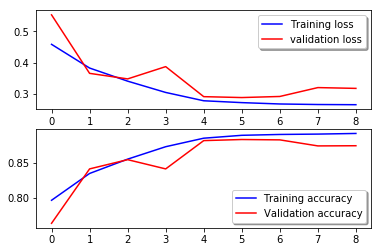

In [16]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [17]:
# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(val_dir,
                                        target_size=(INPUT_SIZE,INPUT_SIZE),
                                        batch_size=1,
                                        class_mode='binary',
                                        shuffle=False)


#checking class indices assigned by keras
print(test_gen.class_indices)


#make a prediction
from sklearn.metrics import roc_curve, auc, roc_auc_score

Y_pred = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

fp_rate, tp_rate, thresholds = roc_curve(test_gen.classes, Y_pred)
auc_keras = auc(fp_rate, tp_rate)




Found 16000 images belonging to 2 classes.
{'0': 0, '1': 1}
16000/16000 [==============================] - 77s 5ms/step


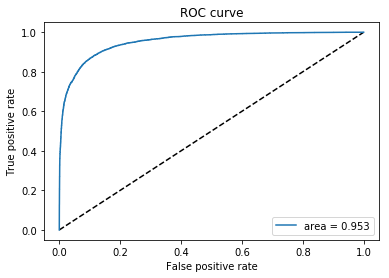

In [18]:
#plotting ROC curv
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fp_rate, tp_rate, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [19]:
# Source: Scikit Learn website
# http://scikit-learn.org/stable/auto_examples/
# model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-
# selection-plot-confusion-matrix-py


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[7301  699]
 [1184 6816]]


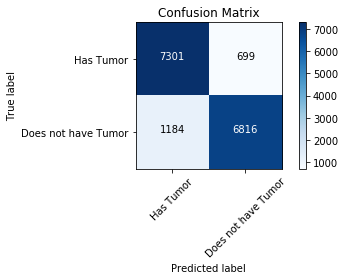

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import itertools


Y_pred = np.where(Y_pred > 0.7, 1, 0)

confusion_mtx = confusion_matrix(test_gen.classes, Y_pred) 
plot_confusion_matrix(confusion_mtx, ['Has Tumor', 'Does not have Tumor'], title='Confusion Matrix')


In [21]:

# Generate a classification report

# For this to work we need y_pred as binary labels not as probabilities
report = classification_report(test_gen.classes, Y_pred, target_names=['Has Tumor', 'Does not have Tumor'])

print(report)

                     precision    recall  f1-score   support

          Has Tumor       0.86      0.91      0.89      8000
Does not have Tumor       0.91      0.85      0.88      8000

           accuracy                           0.88     16000
          macro avg       0.88      0.88      0.88     16000
       weighted avg       0.88      0.88      0.88     16000



In [22]:
#Test Set Prediction

shutil.rmtree('base_dir')
# create test_dir
test_dir = 'test_dir'
os.mkdir(test_dir)
    
# create test_images inside test_dir
test_images = os.path.join(test_dir, 'test_images')
os.mkdir(test_images)

In [23]:
# Transfer the test images into image_dir

test_list = os.listdir('../input/test')

for image in test_list:
    
    fname = image
    
    # source path to image
    src = os.path.join('../input/test', fname)
    # destination path to image
    dst = os.path.join(test_images, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [24]:
test_path ='test_dir'


# Here we change the path to point to the test_images folder.

test_gen = datagen.flow_from_directory(test_path,
                                        target_size=(INPUT_SIZE,INPUT_SIZE),
                                        batch_size=1,
                                        class_mode='binary',
                                        shuffle=False)

Found 57458 images belonging to 1 classes.


In [25]:
num_test_images = 57458

predictions = model.predict_generator(test_gen, steps=num_test_images, verbose=1)

57458/57458 [==============================] - 279s 5ms/step


In [26]:
print(predictions)

[[0.995423  ]
 [0.95401716]
 [0.8517514 ]
 ...
 [0.00130513]
 [0.92789525]
 [0.17890576]]


In [27]:
# Put the predictions into a dataframe
predictions = np.where(predictions > 0.7, 1, 0)
print(predictions)

[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]


In [28]:


df_preds = pd.DataFrame(predictions, columns=['pred'])

df_preds.head()

,pred
0,1
1,1
2,1
3,0
4,0


In [29]:
# This outputs the file names in the sequence in which 
# the generator processed the test images.
test_filenames = test_gen.filenames

# add the filenames to the dataframe
df_preds['file_names'] = test_filenames

df_preds.head()

,pred,file_names
0,1,test_images/00006537328c33e284c973d7b39d340809...
1,1,test_images/0000ec92553fda4ce39889f9226ace43ca...
2,1,test_images/00024a6dee61f12f7856b0fc6be20bc7a4...
3,0,test_images/000253dfaa0be9d0d100283b22284ab2f6...
4,0,test_images/000270442cc15af719583a8172c87cd2bd...


In [30]:
# Create an id column

# A file name now has this format: 
# test_images/00006537328c33e284c973d7b39d340809f7271b.tif

# This function will extract the id:
# 00006537328c33e284c973d7b39d340809f7271b


def extract_id(x):
    
    # split into a list
    a = x.split('/')
    # split into a list
    b = a[1].split('.')
    extracted_id = b[0]
    
    return extracted_id

df_preds['id'] = df_preds['file_names'].apply(extract_id)

df_preds.head()

,pred,file_names,id
0,1,test_images/00006537328c33e284c973d7b39d340809...,00006537328c33e284c973d7b39d340809f7271b
1,1,test_images/0000ec92553fda4ce39889f9226ace43ca...,0000ec92553fda4ce39889f9226ace43cae3364e
2,1,test_images/00024a6dee61f12f7856b0fc6be20bc7a4...,00024a6dee61f12f7856b0fc6be20bc7a48ba3d2
3,0,test_images/000253dfaa0be9d0d100283b22284ab2f6...,000253dfaa0be9d0d100283b22284ab2f6b643f6
4,0,test_images/000270442cc15af719583a8172c87cd2bd...,000270442cc15af719583a8172c87cd2bd9c7746


In [31]:
#print(df_preds[df_preds['pred']==1])

In [32]:
# Get the predicted labels.
# We were asked to predict a probability that the image has tumor tissue
#df_preds = df_preds[df_preds['pred']==1]
y_pred = df_preds['pred']
# get the id column
image_id = df_preds['id']



In [33]:

print(image_id.shape)
print(y_pred.shape)

(57458,)
(57458,)


In [34]:
submission = pd.DataFrame({'id':image_id, 
                           'label':y_pred, 
                          }).set_index('id')

submission.to_csv('patch_preds.csv', columns=['label']) 

In [35]:
submission.head()
print(submission)

                                          label
id                                             
00006537328c33e284c973d7b39d340809f7271b      1
0000ec92553fda4ce39889f9226ace43cae3364e      1
00024a6dee61f12f7856b0fc6be20bc7a48ba3d2      1
000253dfaa0be9d0d100283b22284ab2f6b643f6      0
000270442cc15af719583a8172c87cd2bd9c7746      0
000309e669fa3b18fb0ed6a253a2850cce751a95      0
000360e0d8358db520b5c7564ac70c5706a0beb0      0
00040095a4a671280aeb66cb0c9231e6216633b5      0
000698b7df308d75ec9559ef473a588c513a68aa      1
0006e1af5670323331d09880924381d67d79eda0      1
000997a6038fa7441aa0111ac456255060a354c4      0
000c8db3e09f1c0f3652117cf84d78aae100e5a7      0
000de14191f3bab4d2d6a7384ca0e5aa5dc0dffe      1
000e6341cf18365d35b40f4991002fec8834afc0      0
0010e2887e0b977fcdfdf4c50564fafbbc2b6208      0
0010e7eaa3d8e14203cd3900b739d8bf0f0b67f0      1
001161a2eca200f565f12870048a78fa5b320dee      1
0011807dd1e3306ff3f7a755fd3efbefa2901dce      0
00118bec91b7fae175791896f7011ff506b3d7dd

In [36]:
# Delete the test_dir directory we created to prevent a Kaggle error.
# Kaggle allows a max of 500 files to be saved.

shutil.rmtree('test_dir')